In [1]:
#importing the basic models.
import pandas as pd
import numpy as np

In [2]:
voice_data=pd.read_csv("Dataset.csv")

In [3]:
voice_data=voice_data.drop(['name','mfcc','centroid','rolloff','zcr',],axis=1)

In [4]:
voice_data.gender.unique()

array(['female', 'male', 'other'], dtype=object)

In [5]:
noisy_data=voice_data[voice_data['gender']=='other'].index
voice_data=voice_data.drop(noisy_data)

In [6]:
voice_data.gender.unique()
voice_data.shape

(27388, 10)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice_data["gender"] = le.fit_transform(voice_data["gender"])
le.classes_

array(['female', 'male'], dtype=object)

In [8]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27388 entries, 0 to 27667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    27387 non-null  float64
 1   sd      27387 non-null  float64
 2   median  27388 non-null  float64
 3   mode    27388 non-null  float64
 4   Q25     27388 non-null  float64
 5   Q75     27388 non-null  float64
 6   IQR     27388 non-null  float64
 7   skew    27387 non-null  float64
 8   kurt    27387 non-null  float64
 9   gender  27388 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 2.2 MB


In [9]:
voice_data[:]=preprocessing.MinMaxScaler().fit_transform(voice_data)

In [10]:
dev_data=voice_data[25000:]
voice_data=voice_data[0:25000]

In [11]:
voice_data=voice_data.dropna()

In [12]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24999 entries, 0 to 25260
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    24999 non-null  float64
 1   sd      24999 non-null  float64
 2   median  24999 non-null  float64
 3   mode    24999 non-null  float64
 4   Q25     24999 non-null  float64
 5   Q75     24999 non-null  float64
 6   IQR     24999 non-null  float64
 7   skew    24999 non-null  float64
 8   kurt    24999 non-null  float64
 9   gender  24999 non-null  float64
dtypes: float64(10)
memory usage: 2.1 MB


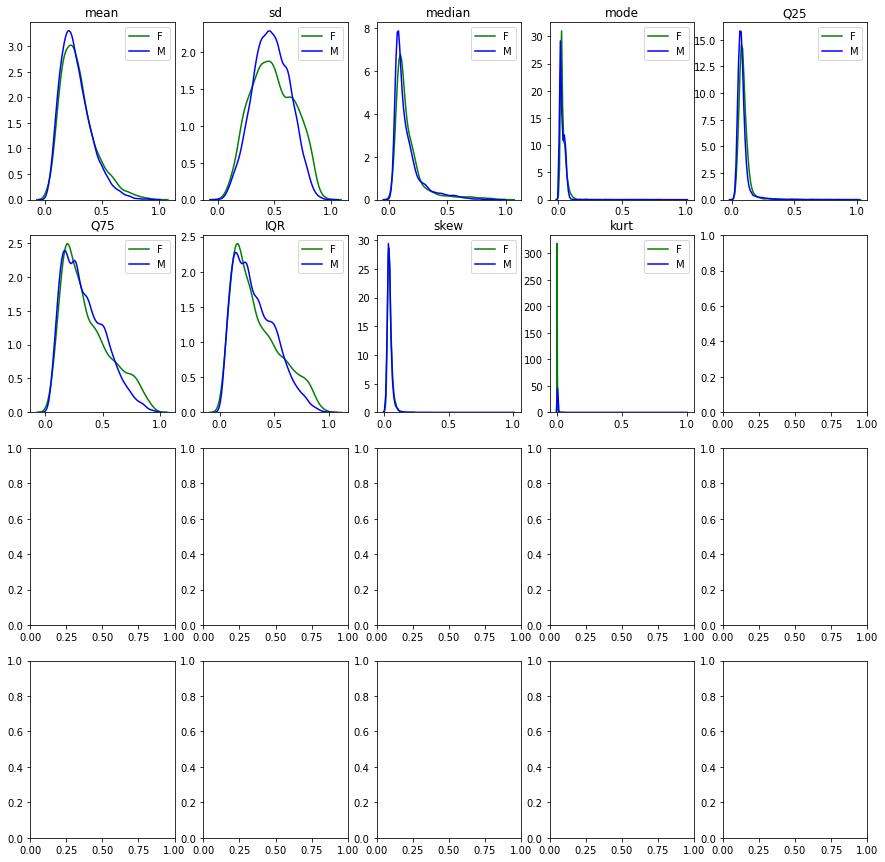

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,10):
    plt.subplot(4,5,i)
    plt.title(voice_data.columns[i-1])
    sns.kdeplot(voice_data.loc[voice_data['gender'] == 0, voice_data.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice_data.loc[voice_data['gender'] == 1, voice_data.columns[i-1]], color= 'blue', label='M')

In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [15]:
train, test = train_test_split(voice_data, test_size=0.3)

In [16]:
x_train = train.iloc[:, :-1]

y_train = train["gender"]
x_test = test.iloc[:, :-1]
y_test = test["gender"]

In [17]:
x_train.isnull().values.any()

False

In [18]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [19]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.23573333333333332 occurs at k=17.


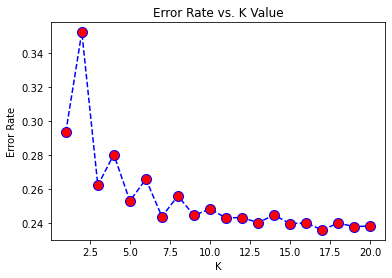

In [20]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [21]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.5885    0.2261    0.3267      1897
        male     0.7832    0.9465    0.8571      5603

    accuracy                         0.7643      7500
   macro avg     0.6858    0.5863    0.5919      7500
weighted avg     0.7339    0.7643    0.7230      7500



In [22]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.3067    0.5098    0.3830      1897
        male     0.7861    0.6099    0.6868      5603

    accuracy                         0.5845      7500
   macro avg     0.5464    0.5598    0.5349      7500
weighted avg     0.6648    0.5845    0.6100      7500



In [23]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.19506666666666667 occurs at n=61.


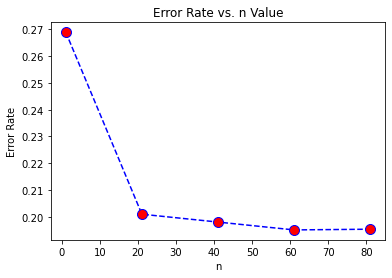

In [24]:
e=rf_error(100,x_train,y_train,x_test,y_test)


In [25]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.6723    0.4402    0.5320      1897
        male     0.8303    0.9274    0.8761      5603

    accuracy                         0.8041      7500
   macro avg     0.7513    0.6838    0.7041      7500
weighted avg     0.7903    0.8041    0.7891      7500



In [26]:
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.6674    0.4581    0.5433      1897
        male     0.8341    0.9227    0.8762      5603

    accuracy                         0.8052      7500
   macro avg     0.7508    0.6904    0.7097      7500
weighted avg     0.7920    0.8052    0.7920      7500



In [27]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [28]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [29]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.7506714669409681
rbf  out-of-sample accuracy in SVM:  0.7468
poly  in-sample accuracy in SVM:  0.7499285673467055
poly  out-of-sample accuracy in SVM:  0.7470666666666667
linear  in-sample accuracy in SVM:  0.7499285673467055
linear  out-of-sample accuracy in SVM:  0.7470666666666667
Highest accuracy is 0.7470666666666667 occurs at poly kernel.


In [ ]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [ ]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)